In [1]:
# Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tldextract
from collections import Counter
import math

In [3]:
# Read data.
alexa_data = pd.read_csv('alexa_100k.csv', header=None, names=['rank', 'uri'], encoding='utf-8')
alexa_data.head()

,rank,uri
0,1,facebook.com
1,2,google.com
2,3,youtube.com
3,4,yahoo.com
4,5,baidu.com


In [4]:
def extractDomain(uri):
    extract = tldextract.extract(uri)
    if not extract.suffix:
        return np.nan
    else:
        return extract.domain

In [5]:
x = extractDomain('https://www.google.com')
x

'google'

In [6]:
def entropy(uri):
    elements, lns = Counter(uri), float(len(uri))
    return -sum(element/lns * math.log(element/lns,2) for element in elements.values())

In [7]:
alexa_data['domain'] = [extractDomain(uri) for uri in alexa_data['uri']]
alexa_data.head()

,rank,uri,domain
0,1,facebook.com,facebook
1,2,google.com,google
2,3,youtube.com,youtube
3,4,yahoo.com,yahoo
4,5,baidu.com,baidu


In [8]:
# Remove NAs and duplicates.
alexa_data = alexa_data.dropna()
alexa_data = alexa_data.drop_duplicates()
print len(alexa_data)

99838


In [9]:
# Remove columns.
del alexa_data['uri']
del alexa_data['rank']
alexa_data.head()

,domain
0,facebook
1,google
2,youtube
3,yahoo
4,baidu


In [10]:
alexa_data['label'] = 'legit'
alexa_data.head()

,domain,label
0,facebook,legit
1,google,legit
2,youtube,legit
3,yahoo,legit
4,baidu,legit


In [11]:
alexa_data = alexa_data.reindex(np.random.permutation(alexa_data.index))

In [12]:
# Read DGA data.
dga_domains = pd.read_csv('dga_domain.txt', header=None, names=['domain'], encoding='utf-8')
dga_domains.head()

,domain
0,04055051be412eea5a61b7da8438be3d.info
1,1cb8a5f36f.info
2,30acd347397c34fc273e996b22951002.org
3,336c986a284e2b3bc0f69f949cb437cb.info
4,336c986a284e2b3bc0f69f949cb437cb.org


In [13]:
# Normalization and strips.
dga_domains['domain'] = dga_domains.applymap(lambda x: x.split('.')[0].strip().lower())
dga_domains.head()

,domain
0,04055051be412eea5a61b7da8438be3d
1,1cb8a5f36f
2,30acd347397c34fc273e996b22951002
3,336c986a284e2b3bc0f69f949cb437cb
4,336c986a284e2b3bc0f69f949cb437cb


In [14]:
# Sanitize.
dga_domains['domain'].dropna()
dga_domains['domain'].drop_duplicates()
print 'length ' + str(len(dga_domains))

length 2669


In [15]:
# Add label dga.
dga_domains['label'] = 'dga'
dga_domains.head()

,domain,label
0,04055051be412eea5a61b7da8438be3d,dga
1,1cb8a5f36f,dga
2,30acd347397c34fc273e996b22951002,dga
3,336c986a284e2b3bc0f69f949cb437cb,dga
4,336c986a284e2b3bc0f69f949cb437cb,dga


In [16]:
all_domains = pd.concat([alexa_data, dga_domains], ignore_index=True)
all_domains.head()

,domain,label
0,capturedbloggingtips,legit
1,bpergroup,legit
2,reco,legit
3,partnercardservices,legit
4,secure,legit


In [17]:
# People said that domains with a length less than 6 are very random.
all_domains['length'] = [len(x) for x in all_domains['domain']]
all_domains['entropy'] = [entropy(x) for x in all_domains['domain']]

In [18]:
all_domains.head()

,domain,label,length,entropy
0,capturedbloggingtips,legit,20,3.784184
1,bpergroup,legit,9,2.725481
2,reco,legit,4,2.000000
3,partnercardservices,legit,19,3.260828
4,secure,legit,6,2.251629


In [19]:
all_domains['label'] == 'dga'

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
102477     True
102478     True
102479     True
102480     True
102481     True
102482     True
102483     True
102484     True
102485     True
102486     True
102487     True
102488     True
102489     True
102490     True
102491     True
102492     True
102493     True
102494     True
102495     True
102496     True
102497     True
102498     True
102499     True
102500     True
102501     True
102502     True
102503     True
102504     True
102505     True
102506     True
Name: label, dtype: bool

In [20]:
all_domains = all_domains[all_domains['length'] > 6]
len(all_domains)

74200

In [21]:
all_domains['length'] < 6

0         False
1         False
3         False
6         False
8         False
11        False
14        False
16        False
17        False
18        False
20        False
21        False
24        False
25        False
26        False
27        False
28        False
30        False
31        False
32        False
33        False
35        False
37        False
38        False
39        False
41        False
42        False
43        False
44        False
45        False
          ...  
102477    False
102478    False
102479    False
102480    False
102481    False
102482    False
102483    False
102484    False
102485    False
102486    False
102487    False
102488    False
102489    False
102490    False
102491    False
102492    False
102493    False
102494    False
102495    False
102496    False
102497    False
102498    False
102499    False
102500    False
102501    False
102502    False
102503    False
102504    False
102505    False
102506    False
Name: length, dtype: boo

In [22]:
# Split data to dga and legit to do some scatter plots
split_condition = all_domains['label'] == 'legit'
print len(split_condition)
type(split_condition)

74200


pandas.core.series.Series

In [23]:
# dga and non-dga
legit = all_domains[split_condition]
dga = all_domains[~split_condition]
dga.head()

,domain,label,length,entropy
99838,04055051be412eea5a61b7da8438be3d,dga,32,3.569549
99839,1cb8a5f36f,dga,10,3.121928
99840,30acd347397c34fc273e996b22951002,dga,32,3.628928
99841,336c986a284e2b3bc0f69f949cb437cb,dga,32,3.515320
99842,336c986a284e2b3bc0f69f949cb437cb,dga,32,3.515320


In [24]:
len(dga)

2669

In [25]:
import sklearn.feature_extraction
import ngram


# When building the dictionary take into account terms that have only a document frequency as a minimum 4 
alexa_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)
print type(alexa_vc)
print alexa_vc

<class 'sklearn.feature_extraction.text.CountVectorizer'>
CountVectorizer(analyzer='char', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0001,
        ngram_range=(3, 5), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [26]:
counts_matrix = alexa_vc.fit_transform(alexa_data['domain'])

In [27]:
# alexa_vc.get_feature_names()
# alexa_vc.vocabulary_.get('chan')
print type(counts_matrix)
print counts_matrix.shape
print counts_matrix.nnz
print counts_matrix

<class 'scipy.sparse.csr.csr_matrix'>
(99838, 25040)
1248380
  (0, 8816)	1
  (0, 10569)	1
  (0, 8518)	1
  (0, 15872)	1
  (0, 12816)	1
  (0, 3219)	1
  (0, 4583)	1
  (0, 18073)	1
  (0, 2030)	1
  (0, 21953)	1
  (0, 8815)	1
  (0, 14766)	1
  (0, 10565)	1
  (0, 8574)	1
  (0, 8517)	1
  (0, 15871)	1
  (0, 12814)	1
  (0, 3212)	1
  (0, 4582)	1
  (0, 18603)	1
  (0, 23209)	1
  (0, 22558)	1
  (0, 18072)	1
  (0, 2029)	1
  (0, 3606)	1
  :	:
  (99835, 8838)	1
  (99835, 22887)	1
  (99835, 8837)	1
  (99835, 22885)	1
  (99835, 8835)	1
  (99835, 14482)	1
  (99835, 9902)	1
  (99835, 7051)	1
  (99835, 16281)	1
  (99835, 14471)	1
  (99836, 18063)	1
  (99836, 2027)	1
  (99836, 23868)	1
  (99836, 18059)	1
  (99836, 21904)	1
  (99836, 2023)	1
  (99837, 16302)	1
  (99837, 8079)	1
  (99837, 14618)	1
  (99837, 8078)	1
  (99837, 14504)	1
  (99837, 10485)	1
  (99837, 14611)	1
  (99837, 10480)	1
  (99837, 16281)	1


In [28]:
alexa_counts = np.log10(counts_matrix.sum(axis=0).getA1())

In [58]:
ngrams_list = alexa_vc.get_feature_names()
print ngrams_list

[u'-20', u'-36', u'-a-', u'-ac', u'-ad', u'-ads', u'-af', u'-ag', u'-ai', u'-air', u'-al', u'-am', u'-an', u'-and', u'-and-', u'-ani', u'-anim', u'-ap', u'-ar', u'-arc', u'-arch', u'-art', u'-arti', u'-as', u'-at', u'-au', u'-aut', u'-auto', u'-av', u'-ba', u'-ban', u'-bank', u'-bb', u'-be', u'-ben', u'-benz', u'-bi', u'-bl', u'-blo', u'-blog', u'-bo', u'-boo', u'-book', u'-br', u'-bu', u'-bus', u'-busi', u'-bux', u'-ca', u'-car', u'-cas', u'-ce', u'-cel', u'-cen', u'-cent', u'-ch', u'-cha', u'-chan', u'-che', u'-chi', u'-chin', u'-ci', u'-cl', u'-cli', u'-clu', u'-club', u'-co', u'-cod', u'-code', u'-col', u'-com', u'-comp', u'-con', u'-cr', u'-cu', u'-da', u'-dat', u'-de', u'-de-', u'-dea', u'-deal', u'-des', u'-desi', u'-di', u'-dig', u'-dir', u'-dire', u'-do', u'-dom', u'-doma', u'-dow', u'-down', u'-dr', u'-dre', u'-du', u'-ea', u'-ed', u'-edu', u'-el', u'-em', u'-emp', u'-en', u'-eng', u'-er', u'-es', u'-eu', u'-eur', u'-euro', u'-ex', u'-exp', u'-expr', u'-fa', u'-fac', u'-fe', 

In [59]:
len(all_domains[all_domains.label == 'dga'])

2669

In [60]:
len(all_domains[all_domains.label == 'legit'])

71364

In [61]:
import operator

_sorted_ngrams = sorted(zip(ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)
print 'Alexa NGrams: %d' % len(_sorted_ngrams)
for ngram, count in _sorted_ngrams:
    print ngram, count

Alexa NGrams: 25040
ing 3.46538285145
lin 3.45009507587
ine 3.42160392687
ter 3.29644579421
tor 3.29136885045
ion 3.26857797188
ent 3.25017594808
por 3.22010808804
the 3.21378329934
log 3.21005084988
net 3.19672872262
tra 3.19617618504
ree 3.19506899647
mar 3.18355453362
web 3.18041263284
ers 3.17926446434
and 3.16672605558
line 3.16465021593
art 3.16046853112
sta 3.15866398081
ame 3.15715443991
est 3.14921911266
ire 3.14921911266
nli 3.14891099311
res 3.14612803568
blo 3.14301480025
ect 3.1398790864
for 3.13924921757
onl 3.13449585583
new 3.11427729656
nlin 3.11327469246
onli 3.10448711131
nline 3.10380372096
one 3.10105935491
onlin 3.09864372582
blog 3.09829753649
fre 3.0916669576
dia 3.08990511144
ate 3.08635983067
ess 3.08457627793
rec 3.07188200731
ark 3.0715138051
ver 3.06892761168
all 3.06333335895
ind 3.05766610391
ite 3.05422990986
wor 3.05230909965
dir 3.05076631123
pro 3.04805317312
ati 3.04727486738
ide 3.04178731897
gam 3.03702787976
mes 3.03582982525
ews 3.03542973818
ist

In [62]:
word_dataframe = pd.read_csv('words.txt', header=None, names=['word'], encoding='utf-8', dtype={'word':np.str})
word_dataframe.head()

,word
0,1080
1,10-point
2,10th
3,11-point
4,12-point


In [63]:
# cleanup this mess
word_dataframe = word_dataframe[word_dataframe['word'].map(lambda x: str(x).isalpha())]
word_dataframe = word_dataframe.applymap(lambda x: str(x).strip().lower())
word_dataframe = word_dataframe.dropna()
word_dataframe = word_dataframe.drop_duplicates()
print type(word_dataframe)
word_dataframe.head()
print type(word_dataframe)
word_dataframe.head(30)
word_dataframe.tail(30)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,word
479592,zymoscope
479593,zymoses
479594,zymosimeter
479595,zymosis
479596,zymosterol
479597,zymosthenic
479598,zymotechnic
479599,zymotechnical
479600,zymotechnics
479601,zymotechny


In [64]:
# Calculate ngrams of the dictionary.
dict_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
# dict_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
english_counts_matrix = dict_cv.fit_transform(word_dataframe['word'])

In [65]:
print type(english_counts_matrix)
print english_counts_matrix.shape
print english_counts_matrix.sum(axis=0).getA1()
print np.log(english_counts_matrix.sum(axis=0).getA1())

<class 'scipy.sparse.csr.csr_matrix'>
(415832, 123061)
[14 12  8 ...,  5  5 31]
[ 2.63905733  2.48490665  2.07944154 ...,  1.60943791  1.60943791
  3.4339872 ]


In [66]:
dict_counts = np.log(english_counts_matrix.sum(axis=0).getA1())
ngrams_list = dict_cv.get_feature_names()

In [67]:
print type(dict_counts)
print dict_counts
print type(ngrams_list)
print ngrams_list[1:20]

<type 'numpy.ndarray'>
[ 2.63905733  2.48490665  2.07944154 ...,  1.60943791  1.60943791
  3.4339872 ]
<type 'list'>
[u'aab', u'aac', u'aad', u'aaf', u'aag', u'aah', u'aai', u'aak', u'aal', u'aale', u'aali', u'aalis', u'aals', u'aam', u'aama', u'aami', u'aams', u'aan', u'aani']


In [68]:
def ngram_count(domain):
    alexa_match = alexa_counts * alexa_vc.transform([domain]).T
    dict_match = dict_counts * dict_cv.transform([domain]).T
    print '%s Alexa match:%d, Dictionary match:%d' % (domain, alexa_match, dict_match)

In [69]:
ngram_count('google')
ngram_count('xxrdnsgxijevnij')
ngram_count('playadelcarmentours')
ngram_count('australiaonlineadvertising')

google Alexa match:21, Dictionary match:34
xxrdnsgxijevnij Alexa match:9, Dictionary match:18
playadelcarmentours Alexa match:67, Dictionary match:217
australiaonlineadvertising Alexa match:136, Dictionary match:360


In [70]:
all_domains['alexa_grams'] = alexa_counts * alexa_vc.transform(all_domains['domain']).T
all_domains['word_grams'] = dict_counts * dict_cv.transform(all_domains['domain']).T
all_domains.head()

,domain,label,length,entropy,alexa_grams,word_grams,difference
0,capturedbloggingtips,legit,20,3.784184,81.876400,212.568167,-130.691768
1,bpergroup,legit,9,2.725481,24.282823,83.579897,-59.297074
3,partnercardservices,legit,19,3.260828,94.782910,226.423208,-131.640298
6,bizland,legit,7,2.807355,14.006762,29.394586,-15.387824
8,pageoneevolution,legit,16,3.280639,61.604326,188.088691,-126.484364


In [71]:
all_domains['difference'] = all_domains['alexa_grams'] - all_domains['word_grams']
all_domains.head()

,domain,label,length,entropy,alexa_grams,word_grams,difference
0,capturedbloggingtips,legit,20,3.784184,81.876400,212.568167,-130.691768
1,bpergroup,legit,9,2.725481,24.282823,83.579897,-59.297074
3,partnercardservices,legit,19,3.260828,94.782910,226.423208,-131.640298
6,bizland,legit,7,2.807355,14.006762,29.394586,-15.387824
8,pageoneevolution,legit,16,3.280639,61.604326,188.088691,-126.484364


In [72]:
all_domains.sort_values(by='difference', ascending=True).head(100)

,domain,label,length,entropy,alexa_grams,word_grams,difference
22446,americansforresponsiblesolutions,legit,32,3.667838,150.786296,502.801590,-352.015294
33398,internetmarketingmastermindalliance,legit,35,3.451310,194.730911,537.995716,-343.264806
29915,stirringtroubleinternationally,legit,30,3.481728,135.265622,477.106521,-341.840899
40053,bipolardisorderdepressionanxiety,legit,32,3.616729,118.971784,439.411192,-320.439408
73506,universal-pictures-international-germany,legit,40,3.843943,193.045682,500.339065,-307.293383
56516,ornamentalplantpatentprotection,legit,31,3.232129,136.853986,428.817858,-291.963872
78783,channel4embarrassingillnesses,legit,29,3.440070,97.561204,389.411900,-291.850697
12386,consumerincentivepromotions,legit,27,3.439711,130.317368,417.009995,-286.692627
72801,commercialistatelematico,legit,24,3.229574,122.646724,396.471736,-273.825012
54901,nationalcherryblossomfestival,legit,29,3.857307,110.848020,382.560513,-271.712494


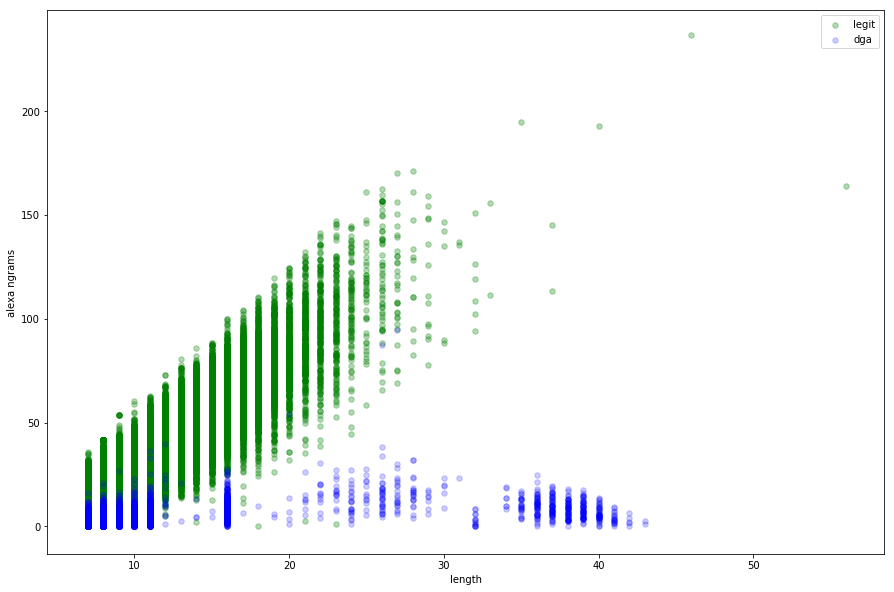

In [73]:
# How DGA and legit domains score in the alexa ngrams, regarding their length.
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

cond = all_domains['label'] == 'dga'
dga = all_domains[cond]
legit = all_domains[~cond]
plt.scatter(legit['length'], legit['alexa_grams'], s=30, c='green', label='legit', alpha=.3)
plt.scatter(dga['length'], dga['alexa_grams'], s=30, c='blue', label='dga', alpha=.2)
plt.legend()
plt.xlabel('length')
plt.ylabel('alexa ngrams')

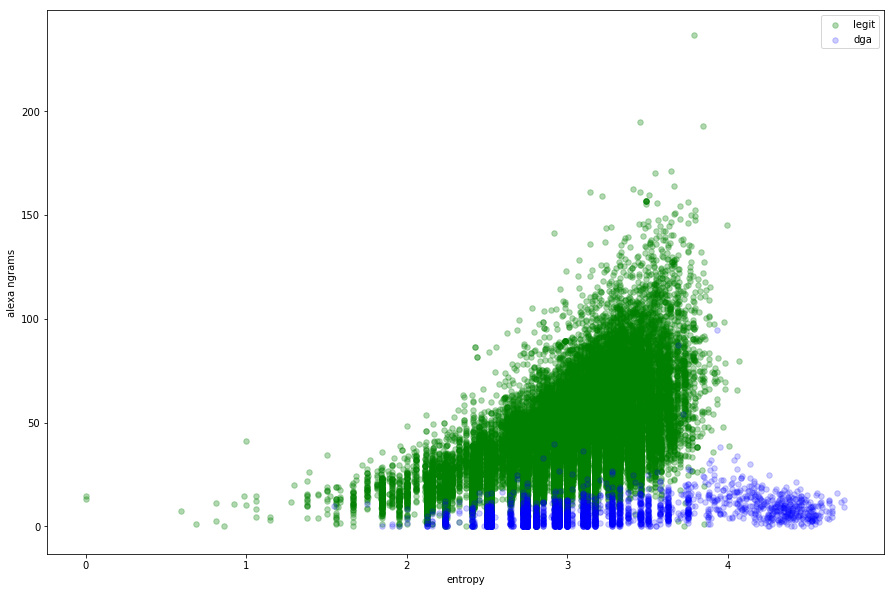

In [74]:
# How DGA and legit domains score on the alexa ngrams, regarding their entropy.
plt.scatter(legit['entropy'], legit['alexa_grams'], s=30, c='green', label='legit', alpha=.3)
plt.scatter(dga['entropy'], dga['alexa_grams'], s=30, c='blue', label='dga', alpha=0.2)
plt.legend()
plt.xlabel('entropy')
plt.ylabel('alexa ngrams')

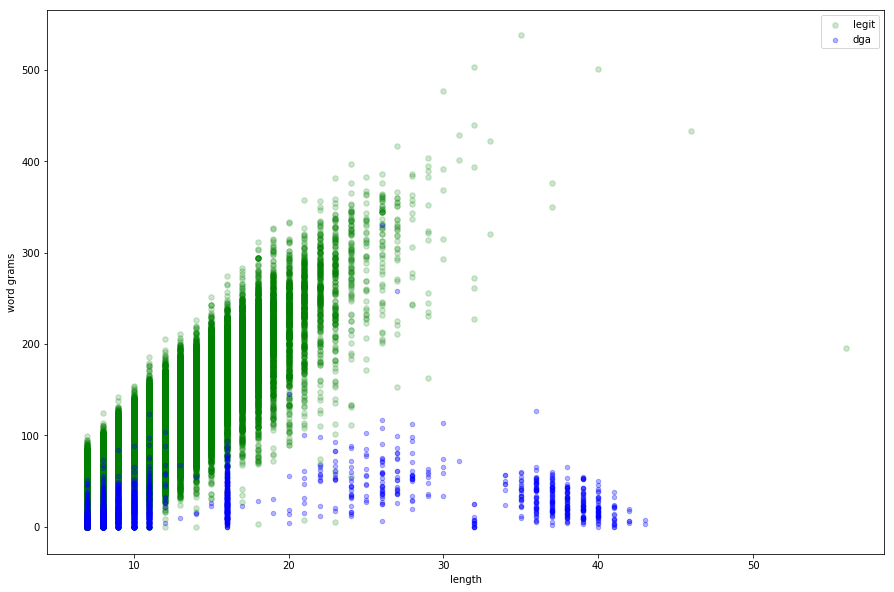

In [75]:
# Now let's see how these guys perform on the word_dictionary ngram, based on length first and then entropy.
plt.scatter(legit['length'], legit['word_grams'], s=30, c='green', label='legit', alpha=.2)
plt.scatter(dga['length'], dga['word_grams'], s=20, c='blue', label='dga', alpha=.3)
plt.legend()
plt.xlabel('length')
plt.ylabel('word grams')

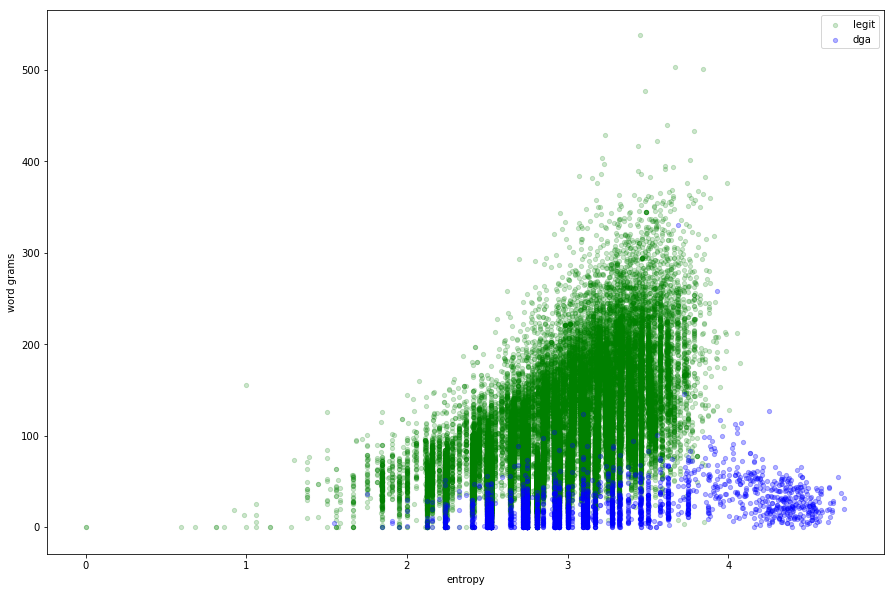

In [76]:
plt.scatter(legit['entropy'], legit['word_grams'], s=18, c='green', label='legit', alpha=.2)
plt.scatter(dga['entropy'], dga['word_grams'], s=18, c='blue', label='dga', alpha=.3)
plt.legend()
plt.xlabel('entropy')
plt.ylabel('word grams')

In [77]:
# Words that did not score in the words grams
all_domains[(all_domains['word_grams'] == 0)].head(100)

,domain,label,length,entropy,alexa_grams,word_grams,difference
31,5201516,unclassified,7,2.235926,3.952792,0.0,3.952792
427,8884321,unclassified,7,2.128085,2.819544,0.0,2.819544
2074,xz13148,unclassified,7,2.521641,1.113943,0.0,1.113943
2839,05tz2e9,unclassified,7,2.807355,0.000000,0.0,0.000000
3977,0771120,unclassified,7,1.950212,1.079181,0.0,1.079181
4669,gxhc365,unclassified,7,2.807355,2.130334,0.0,2.130334
5516,720pmkv,unclassified,7,2.807355,0.000000,0.0,0.000000
5783,pdf2jpg,unclassified,7,2.521641,1.770852,0.0,1.770852
6271,0594139,unclassified,7,2.521641,2.187521,0.0,2.187521
6470,htky365,unclassified,7,2.807355,3.130334,0.0,3.130334


In [78]:
# Some statistics to understand why these guys score 0.
all_domains[all_domains['label'] == 'legit'].describe()

,length,entropy,alexa_grams,word_grams,difference
count,71364.000000,71364.000000,71364.000000,71364.000000,71364.000000
mean,10.777016,2.923245,33.954478,93.039324,-59.084846
std,3.363362,0.343975,19.481459,52.850698,35.964385
min,7.000000,-0.000000,0.000000,0.000000,-352.015294
25%,8.000000,2.725481,19.865965,54.704875,-77.802013
50%,10.000000,2.921928,29.614388,82.298737,-52.452033
75%,13.000000,3.169925,43.168227,120.301371,-33.500935
max,56.000000,4.070656,236.708285,537.995716,14.701216


In [79]:
# Some statistics to see the details of the DGA with grams included.
all_domains[all_domains['label'] == 'dga'].describe()

,length,entropy,alexa_grams,word_grams,difference
count,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000
mean,14.142001,3.160549,6.051285,20.468881,-14.417596
std,9.800888,0.592126,5.791733,19.794665,14.401238
min,7.000000,1.548795,0.000000,0.000000,-242.632246
25%,8.000000,2.750000,2.225309,7.160846,-20.211321
50%,10.000000,3.000000,4.754425,15.424329,-10.769164
75%,16.000000,3.459432,8.455874,28.701701,-4.672059
max,43.000000,4.721612,94.780691,329.997474,5.013610


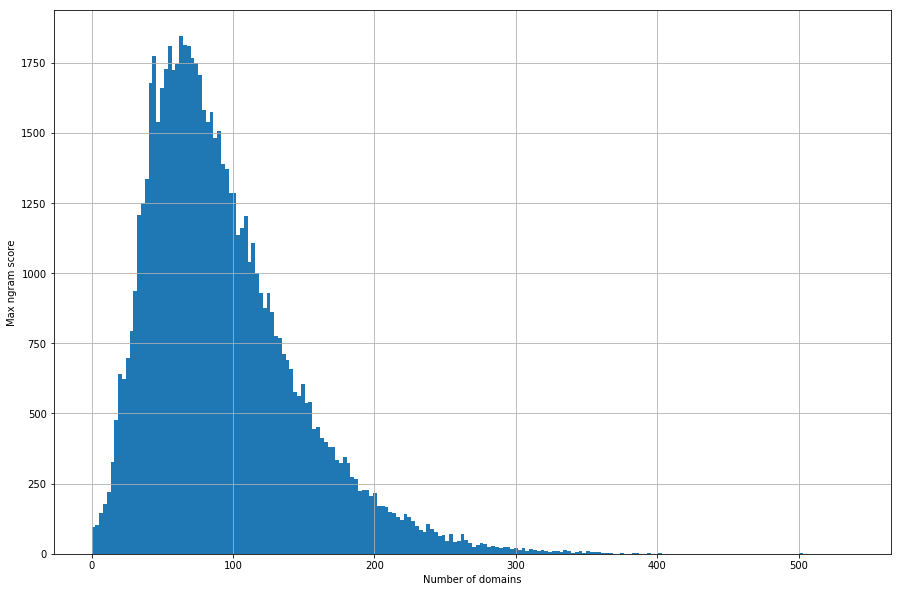

In [80]:
# Histogram of 
max_gram = np.maximum(legit['alexa_grams'], legit['word_grams'])
ax = max_gram.hist(bins=200)
plt.xlabel('Number of domains')
plt.ylabel('Max ngram score')

In [81]:
unclassified_domains = (all_domains['label'] == 'legit') & (all_domains['alexa_grams'] < 10) & (all_domains['word_grams'] < 3)
unclassified_domains
unclassified = all_domains[unclassified_domains]
unclassified.shape
unclassified

,domain,label,length,entropy,alexa_grams,word_grams,difference


In [82]:
# Add an unclassified column.
all_domains.loc[unclassified_domains, 'label'] = 'unclassified'
print all_domains['class'].value_counts()
all_domains[all_domains['class'] == 'unclassified'].head()

KeyError: 'class'

/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Confusion Matrix Stats
legit/legit: 99.67% (14204/14251)
legit/unclassified: 0.00% (0/14251)
legit/dga: 0.33% (47/14251)
unclassified/legit: 0.00% (0/40)
unclassified/unclassified: 80.00% (32/40)
unclassified/dga: 20.00% (8/40)
dga/legit: 18.03% (99/549)
dga/unclassified: 0.18% (1/549)
dga/dga: 81.79% (449/549)


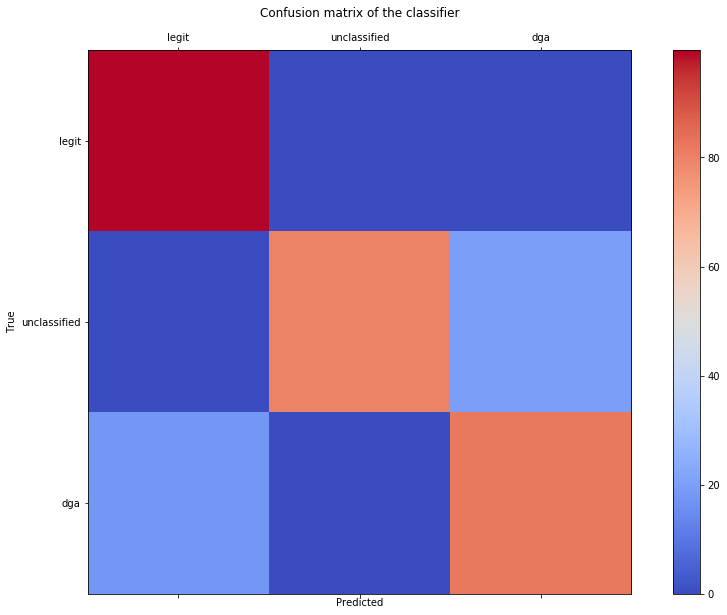

In [83]:
import sklearn.ensemble
from sklearn.metrics import confusion_matrix


def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print 'Confusion Matrix Stats'
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print "%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum())

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Instance of a Random Forest Classifier
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=20)

# Alexa and Dictionary NGrams and the exclusion of the bad exemplars.
X = all_domains.as_matrix(['length', 'entropy', 'alexa_grams', 'word_grams'])

# Labels (scikit learn uses 'y' for classification labels)
y = np.array(all_domains['label'].tolist())

# Train on a 80/20 split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Now plot the results of the 80/20 split in a confusion matrix
labels = ['legit', 'unclassified', 'dga']
cm = confusion_matrix(y_test, y_pred, labels)
plot_cm(cm, labels)

Confusion Matrix Stats
legit/legit: 99.59% (14213/14271)
legit/dga: 0.41% (58/14271)
dga/legit: 15.49% (83/536)
dga/dga: 84.51% (453/536)


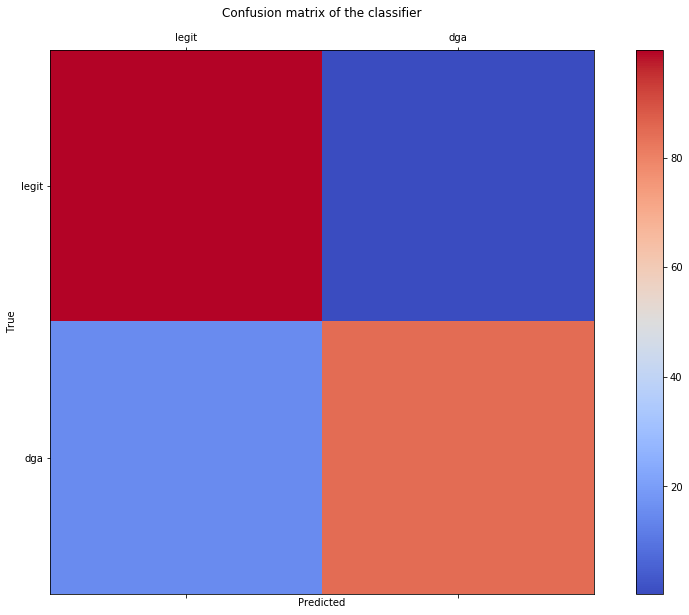

In [84]:
# Perhaps we will just exclude the weird class from our ML training
not_unclassified = all_domains[all_domains['label'] != 'unclassified']
X = not_unclassified.as_matrix(['length', 'entropy', 'alexa_grams', 'word_grams'])

# Labels (scikit learn uses 'y' for classification labels)
y = np.array(not_unclassified['label'].tolist())

# Train on a 80/20 split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Now plot the results of the 80/20 split in a confusion matrix
labels = ['legit', 'dga']
cm = confusion_matrix(y_test, y_pred, labels)
plot_cm(cm, labels)


In [85]:
alexa_total = alexa_data.shape[0]

# Hold out 10%
hold_out_alexa = alexa_data[alexa_total*.9:]
alexa_data = alexa_data[:alexa_total*.9]

# First train on the whole thing before looking at prediction performance
clf.fit(X, y)

# Pull together our hold out set
hold_out_domains = pd.concat([hold_out_alexa, hold_out_dga], ignore_index=True)

# Add a length field for the domain
hold_out_domains['length'] = [len(x) for x in hold_out_domains['domain']]
hold_out_domains = hold_out_domains[hold_out_domains['length'] > 6]

# Add a entropy field for the domain
hold_out_domains['entropy'] = [entropy(x) for x in hold_out_domains['domain']]

# Compute NGram matches for all the domains and add to our dataframe
hold_out_domains['alexa_grams']= alexa_counts * alexa_vc.transform(hold_out_domains['domain']).T
hold_out_domains['word_grams']= dict_counts * dict_vc.transform(hold_out_domains['domain']).T

hold_out_domains.head()

TypeError: cannot do slice indexing on <class 'pandas.indexes.numeric.Int64Index'> with these indexers [89854.2] of <type 'float'>

In [104]:
# We can also look at what features the learning algorithm thought were the most important
importances = zip(['length', 'entropy', 'alexa_grams', 'word_grams'], clf.feature_importances_)
print importances

def dga_model(domain):
    
    _alexa_match = alexa_counts * alexa_vc.transform([domain]).T
    _dict_match = dict_counts * dict_cv.transform([domain]).T
    _X = [len(domain), entropy(domain), _alexa_match, _dict_match]
    print '%s : %s' % (domain, clf.predict(_X)[0])

[('length', 0.13632782964157442), ('entropy', 0.14684397001617305), ('alexa_grams', 0.46291397486949426), ('word_grams', 0.25391422547275816)]


In [87]:
dga_model('facebook')
dga_model('wwcdhdhijsfsuyr')
dga_model('aemosuaokkwmqqmq')
dga_model('sibernetwork')
dga_model('hesapdeneme')
dga_model('skyyekwwcyuaowog')
dga_model('mymqmisiqmumayqe')
dga_model('mybilliondollarapp')
dga_model('wyeupyaihearwrfb')
dga_model('crediq')
dga_model('purecreativemarketing')
dga_model('gamzbotnet')
dga_model('blcksecurity')
dga_model('420peaceavenue')

/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using 

facebook : legit
wwcdhdhijsfsuyr : dga
aemosuaokkwmqqmq : dga
sibernetwork : legit
hesapdeneme : legit
skyyekwwcyuaowog : dga
mymqmisiqmumayqe : dga
mybilliondollarapp : legit
wyeupyaihearwrfb : dga


/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using 

crediq : legit
purecreativemarketing : legit
gamzbotnet : legit
blcksecurity : legit
420peaceavenue : legit


/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [88]:
all_domains['domain'] == '420peaceavenue'

0         False
1         False
3         False
6         False
8         False
11        False
14        False
16        False
17        False
18        False
20        False
21        False
24        False
25        False
26        False
27        False
28        False
30        False
31        False
32        False
33        False
35        False
37        False
38        False
39        False
41        False
42        False
43        False
44        False
45        False
          ...  
102477    False
102478    False
102479    False
102480    False
102481    False
102482    False
102483    False
102484    False
102485    False
102486    False
102487    False
102488    False
102489    False
102490    False
102491    False
102492    False
102493    False
102494    False
102495    False
102496    False
102497    False
102498    False
102499    False
102500    False
102501    False
102502    False
102503    False
102504    False
102505    False
102506    False
Name: domain, dtype: boo

In [89]:
x1 = extractDomain('canet-7444.kapos-net.hu')
x2 = extractDomain('203-121-194-225.e-wire.net.au')

print x1
print x2

kapos-net
e-wire


In [90]:
dga_model('wwcdhdhijsfsuyr')
dga_model('aemosuaokkwmqqmq')
dga_model('sibernetwork')
dga_model('hesapdeneme')
dga_model('mybilliondollarapp')
dga_model('wyeupyaihearwrfb')
dga_model('crediq')
dga_model('purecreativemarketing')
dga_model('gamzbotnet')
dga_model('blcksecurity')
dga_model('420peaceavenue')

/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using 

wwcdhdhijsfsuyr : dga
aemosuaokkwmqqmq : dga
sibernetwork : legit
hesapdeneme : legit
mybilliondollarapp : legit
wyeupyaihearwrfb : dga
crediq : legit
purecreativemarketing : legit
gamzbotnet : legit
blcksecurity : legit
420peaceavenue : legit


/home/shannon/Python_projects/Envs/DGA_detection/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [1]:
import pickle

filename = 'dga.sav'
pickle.dump(clf, open(filename, 'wb'))

NameError: name 'clf' is not defined

In [2]:
filename2='dict_cv.sav'
filename3 = 'dict_counts.sav'
filename4 = 'alexa_counts.sav'
filename5 = 'alexa_vc.sav'

filenames = [filename2, filename3, filename4, filename5]
names = ['dict_cv', 'dict_counts', 'alexa_counts', 'alexa_vc']
data = zip(names, filenames)

for filename in data:
    pickle.dump(filename[0], open(filename[1], 'wb'))
#     pickle.dump()

In [7]:
filenames = [filename2, filename3, filename4, filename5]
names = [filename.split('.')[0] for filename in filenames]

x = pickle.load(open(filename2, 'rb'))
y = pickle.load(open(filename3, 'rb'))
z = pickle.load(open(filename4, 'rb'))
g = pickle.load(open(filename5, 'rb'))
    

In [ ]:
def dga_model(domain):
    
    _alexa_match = alexa_counts * alexa_vc.transform([domain]).T  # Woot matrix multiply and transpose Woo Hoo!
    _dict_match = dict_counts * dict_cv.transform([domain]).T
    _X = [len(domain), entropy(domain), _alexa_match, _dict_match]
    print '%s : %s' % (domain, clf.predict(_X)[0])

In [11]:
g.get_features_name()

AttributeError: 'str' object has no attribute 'get_features_name'